<a href="https://colab.research.google.com/github/surajjeoor/Human_vs_machine_68/blob/main/Code_for_Japanese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this code is designed by following the tutorial on hugging face website, for more details visit : https://huggingface.co/
!pip install transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.3 MB/s eta 0:00:00


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.6 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer,DataCollatorWithPadding
from datasets import load_dataset,Dataset
import pandas as pd

train_df=pd.read_excel("/content/Japanese_Data_Train.xlsx")
val_df=pd.read_excel("/content/Japanese_Data_Val.xlsx")

In [ ]:
train_df.head()

,ID,prompts,text,Generated By,labels
0,1,tell me something about Bromyard In Japanese l...,ブロムヤード（Bromyard）は、イギリスのヘレフォードシャー州に位置する町であり、日本語...,Machine,0
1,2,本,本（ほん）は、書籍（しょせき）または書物（しょもつ）とも呼ばれ、紙・木・竹・絹布などの軟質な...,Human,1
2,3,北海道大学,北海道大学（ほっかいどうだいがく、）は、北海道札幌市北区に本部を置く日本の国立大学である。略...,Human,1
3,4,"tell me something about Jefferson Parish, Loui...",ジェファーソン郡（Jefferson Parish）は、アメリカのルイジアナ州に位置する郡で...,Machine,0
4,5,tell me something about Kes In Japanese language,「Kes」は、日本語では「ケス」と表記されます。「Kes」は、イギリスの作家バリー・ハインズ...,Machine,0


In [ ]:
val_df.head()

,ID,prompts,text,Generated By,labels
0,0.144632,tell me something about The China Syndrome In ...,「チャイナ・シンドローム」とは、1979年に公開されたアメリカの映画です。この映画は、原子力...,Machine,0
1,0.424408,tell me something about German Labour Front In...,ドイツ労働戦線（German Labour Front）は、第二次世界大戦前のナチス・ドイツ...,Machine,0
2,0.758852,"tell me something about Churchville, Pennsylva...",チャーチビルは、ペンシルベニア州に位置する町であり、のどかな雰囲気が特徴です。この町は、広々...,Machine,0
3,0.271992,ポール・エルデシュ,"ポール・エルデシュ、エルデーシュ・パール（Erdős Pál, Paul Erdős; （本...",Human,1
4,0.353160,プトレマイオス,プトレマイオス（、ラテン文字転記：）は、ギリシア人に見られる男性名。 より「プトレマエウス」...,Human,1


In [ ]:
val_df=val_df.drop('prompts',axis=1)
train_df=train_df.drop('prompts',axis=1)

In [ ]:
train_df

,ID,text,Generated By,labels
0,1,ブロムヤード（Bromyard）は、イギリスのヘレフォードシャー州に位置する町であり、日本語...,Machine,0
1,2,本（ほん）は、書籍（しょせき）または書物（しょもつ）とも呼ばれ、紙・木・竹・絹布などの軟質な...,Human,1
2,3,北海道大学（ほっかいどうだいがく、）は、北海道札幌市北区に本部を置く日本の国立大学である。略...,Human,1
3,4,ジェファーソン郡（Jefferson Parish）は、アメリカのルイジアナ州に位置する郡で...,Machine,0
4,5,「Kes」は、日本語では「ケス」と表記されます。「Kes」は、イギリスの作家バリー・ハインズ...,Machine,0
...,...,...,...,...
402,403,PSS（Primary Sjögren's Syndrome）は、日本語では「原発性シェーグ...,Machine,0
403,404,ヒップホップは、1970年代にニューヨークのブロンクス地区で開かれたブロック・パーティーにル...,Human,1
404,405,株価（かぶか、、）とは、当該の株式に関して、株式市場において実際に約定があった価格のこと。出...,Human,1
405,406,\n\n他の紀年法 \n\n 干支 : 甲戌\n 日本\n 元弘4年、建武元年1月29日 -...,Human,1


In [ ]:
from datasets import Dataset
train_dataset=Dataset.from_pandas(train_df)
val_dataset=Dataset.from_pandas(val_df)

In [ ]:
!pip install fugashi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.9/599.9 kB 6.5 MB/s eta 0:00:00


In [ ]:
!pip install ipadic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556703 sha256=59ff11790933408ead0a3748a73e412148c52d2352c24ceafc44588b3410d129
  Stored in directory: /root/.cache/pip/wheels/5b/ea/e3/2f6e0860a327daba3b030853fce4483ed37468bbf1101c59c3
Successfully built ipadic


In [ ]:
#preprocessing data for languages from train
checkpoint="cl-tohoku/bert-base-japanese-char"
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

def tokenization(example):
  return tokenizer(example["text"],truncation=True)

tokenized_dataset_train=train_dataset.map(tokenization,batched=True)
tokenized_dataset_train=tokenized_dataset_train.remove_columns(["text","ID","Generated By"])
tokenized_dataset_train.set_format("torch")

Map:   0%|          | 0/407 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset_val=val_dataset.map(tokenization,batched=True)
tokenized_dataset_val=tokenized_dataset_val.remove_columns(["text","ID","Generated By"])
# tokenized_dataset_val=tokenized_dataset_val.rename_column("Label","labels")
tokenized_dataset_val.set_format("torch")

Map:   0%|          | 0/395 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset_train

Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 407
})

In [ ]:
tokenized_dataset_val

Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 395
})

In [ ]:
data_collator=DataCollatorWithPadding(tokenizer)

In [ ]:
from torch.utils.data import DataLoader

train_dl=DataLoader(dataset=tokenized_dataset_train,batch_size=8,shuffle=True,collate_fn=data_collator)
val_dl=DataLoader(dataset=tokenized_dataset_val,batch_size=8,collate_fn=data_collator)

In [ ]:
for batch in train_dl:
  break
print({k:v.shape for k,v in batch.items()})

{'labels': torch.Size([8]), 'input_ids': torch.Size([8, 512]), 'token_type_ids': torch.Size([8, 512]), 'attention_mask': torch.Size([8, 512])}


In [ ]:
from transformers import AutoModelForSequenceClassification

model=AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-char and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
outputs=model(**batch)

In [ ]:
print(outputs.loss,outputs.logits)

tensor(0.7037, grad_fn=<NllLossBackward0>) tensor([[-0.0420, -0.1931],
        [-0.1114, -0.2050],
        [ 0.1005, -0.0646],
        [ 0.1436, -0.0573],
        [ 0.0439, -0.2305],
        [ 0.0251, -0.1403],
        [ 0.0432, -0.2175],
        [-0.0483, -0.2580]], grad_fn=<AddmmBackward0>)


In [ ]:
!pip install torch

In [ ]:
from transformers import AdamW
import torch
# import torch_xla
# import torch_xla.core.xla_model as xm

In [ ]:
optim=AdamW(params=model.parameters(),lr=5e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
#a learning scheduler will update the optimizers learning rate at each step
from transformers import get_scheduler
num_epochs=2
num_training_step=num_epochs*(len(train_dl))
lr_scheduler=get_scheduler("linear",optimizer=optim,num_warmup_steps=0,num_training_steps=num_training_step)

In [ ]:
#real model training starts
device=torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
print(device)

cuda


In [ ]:
from tqdm.auto import tqdm
# accel=Accelerator()
# model,optimizer,train_dataloader=accel.prepare(model,optim,train_dl)
pro_bar=tqdm(range(num_training_step))
model.train()
for epo in range(num_epochs):
  for batch in train_dl:
    batch={k:v.to(device) for k,v in batch.items()}
    output_1=model(**batch)
    loss=output_1.loss
    # accel.backward(loss)
    loss.backward()

    optim.step()
    lr_scheduler.step()
    optim.zero_grad()
    pro_bar.update(1)

  0%|          | 0/102 [00:00<?, ?it/s]

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 921.3 kB/s eta 0:00:00


In [ ]:
import evaluate

In [ ]:
clf_metrics=evaluate.combine(["accuracy","f1","precision","recall"])

In [ ]:
from datasets import load_metric
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
# accuracy_metric=load_metric('accuracy')
# precision_metric=load_metric('precision')
# recall_metric=load_metric('recall')
# f1_metric=load_metric('f1')
# metric=load_metric("glue","mrpc")
cm=np.zeros((2,2),dtype=np.int)
model.eval()
for batch in val_dl:
  batch={k:v.to(device) for k,v in batch.items()}
  with torch.no_grad():
    outputs=model(**batch)

  logits=outputs.logits
  predictions=torch.argmax(logits,dim=-1)
  # print(predictions)
  # print(batch['labels'])
  # metric.add_batch(predictions=predictions,references=batch["labels"])
  clf_metrics.add_batch(predictions=predictions,references=batch["labels"])
  ref=batch["labels"]
  ref_np=ref.cpu().numpy()
  pred=predictions.cpu().numpy()
  cm+=confusion_matrix(ref_np,pred)
  # accuracy_metric.add_batch(predictions=predictions,references=batch["labels"])
  # precision=precision_metric.compute(predictions=predictions,references=batch["labels"])
  # recall=recall_metric.compute(predictions=predictions,references=batch["labels"])
  # f1_score=f1_metric.compute(predictions=predictions,references=batch["labels"])

# accuracy=accuracy_metric.compute()
# precision=precision_metric.compute()
# recall=recall_metric.compute()
# f1_score=f1_metric.compute()

display1=ConfusionMatrixDisplay(confusion_matrix=cm)
clf_metrics.compute()

<ipython-input-30-bdd000cac3db>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm=np.zeros((2,2),dtype=np.int)


{'accuracy': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}

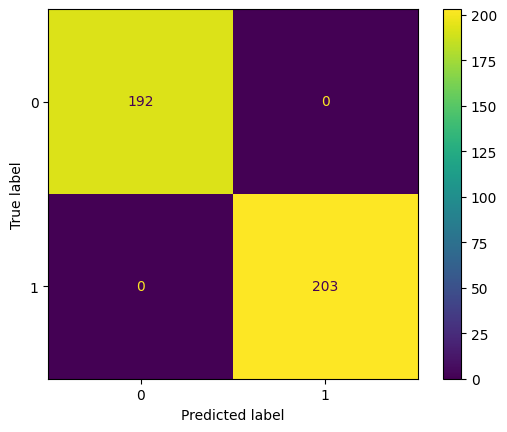

In [ ]:
display1.plot()

In [ ]:
!pip install --upgrade shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

In [ ]:
model_cpu=model.cpu()

In [ ]:
pipe=pipeline(task="text-classification",model=model_cpu,tokenizer=tokenizer)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
text3_machine=["""イズク・ミドリヤについての情報をお伝えします。イズク・ミドリヤは、堀越耕平によって創作された人気のある漫画とアニメシリーズ「僕のヒーローアカデミア」の架空のキャラクターです。

イズク・ミドリヤは通称「デク」として知られ、物語の主人公です。彼の暮らす世界では、ほとんどの人が「個性（クワーク）」と呼ばれる超能力を持っています。しかし、イズクは生まれつき個性を持たず、社会では珍しい「無個性者」です。

個性を持たないにもかかわらず、イズクはアイドルであり、世界最高のヒーローであるオールマイトのようなヒーローになることを夢見ています。イズクの決意と勇気はオールマイトの注意を引き、彼の英雄的な精神を見た後、オールマイトは「ワン・フォー・オール」という強力な個性をイズクに託すことを決定します。"""]

In [ ]:
text1_human=[""" 本作のヒーローは資本主義的精神に則り経済活動や競争を行う主体でありながら、同時に高い職業倫理を持ち、匿名の人々を「救ける[注釈 1]」救済者としても描かれる。一方で主人公の出久はヒーローの持つ自己犠牲や社会奉仕の理念・理想を求める求道者として描かれ、自己絶対化が回避されている。これによって本作は資本主義的精神の上に社会的倫理観を位置づけることに成功したと評される。従来のジャンプ作品主人公は冒険や戦闘がメインで、誰かを救済する事は付随的に描かれる傾向が強かったが、本作はジャンプ王道の枠内で他者の救済を真に価値あるものとして描いている点で画期的であるとされる 堀越は本作について「話の縦糸」である「デクとオールマイトの物語」はあまり明るくないとしている。これは現代日本の社会問題が反映されているためという見方がある。本作はユーモアによって暗さを抑えつつ、「笑い」を自己が不安に耐え、他者を励ますための倫理的手段として描いている。そうすることでヒーローを相対化し、多様な意見の存在を前提としつつ、王道の少年漫画として理念・理想を保ち続けることができたとみなされている"""]

In [ ]:
import shap

In [ ]:
explainer=shap.Explainer(pipe)
shap_values=explainer(text1_human)

  0%|          | 0/498 [00:00<?, ?it/s]


Partition explainer: 2it [10:24, 624.74s/it]              


In [ ]:
score_and_visualize(text1_human,shap_values)

the predicted model is gonna be:[{'label': 'LABEL_1', 'score': 0.995229959487915}]


In [ ]:
def score_and_visualize(textu,shap_values):
  prediction=pipe(textu)
  print(f"the predicted model is gonna be:{prediction}")
  shap.plots.text(shap_values)

In [ ]:
shap_values_2=explainer(text3_machine)

  0%|          | 0/498 [00:00<?, ?it/s]


Partition explainer: 2it [06:29, 389.86s/it]              


In [ ]:
score_and_visualize(text3_machine,shap_values_2)

the predicted model is gonna be:[{'label': 'LABEL_0', 'score': 0.9991294741630554}]
